## First Problem


In [5]:
import pandas as pd

## Second Problem

In [1406]:
def problem2(filename):
    import pandas as pd
    df = pd.read_excel(filename)

    #Solution A
    number_of_subject_fileds = len(df['Subject Field'].value_counts())
    print('solution A')
    print("the number of subject fields:\n" + str(number_of_subject_fileds))
    print()
    
    #Solution B
    max_value = df['Total authors within field'].max()
    max_subject_field = df.loc[df['Total authors within field'] == max_value, 'Subject Field'].iloc[0]
    print('solution B')
    print("the subject field having the highest number of authors:")
    print((max_subject_field,max_value))

    min_value = df['Total authors within field'].min()
    min_subject_field = df.loc[df['Total authors within field'] == min_value, 'Subject Field'].iloc[0]
    print("the subject field having the lowest number of authors:")
    print((min_subject_field,min_value))
    print()
    
    #Solution C

    dff = df[df['Country']=='tur']

    subject_field = dff.groupby('Subject Field')['Authoir Name'].count()

    index_subject_field = list(dff['Subject Field'].unique())
    dff = pd.DataFrame({'subject_field': subject_field},
                     index = index_subject_field)
    print('solution C')
    print('top-10 fields the highest number of scientists from Turkey')
    display(dff.sort_values('subject_field',ascending=False)[:10])
    print()
    
    #Solution D

    df['seniority_level'] = df['lastyr'] - df['firstyr']
    df['number_of_scientists'] = df.groupby(['Subject Field'])['Authoir Name'].transform('nunique')

    i = df[df['number_of_scientists'] >= 200]
    i = i[i['Rank within field'] <= 100]
    i.rename(columns={'Number of Papers':'number_of_papers'},inplace=True)
    i.rename(columns={'Subject Field':'subject_field'},inplace=True)

    top_10 = i.groupby('subject_field').agg(
        {'seniority_level' : ['min', 'mean', 'median', 'max'], 
         'number_of_papers' : ['min', 'mean', 'median', 'max']}).sort_values(
        ('seniority_level','mean'),ascending=False)[:10]
    print('solution D')
    print('top-10 data when data is sorted by mean seniority level')
    display(top_10)
    print()
    
    bottom_10 = i.groupby('subject_field').agg(
        {'seniority_level' : ['min', 'mean', 'median', 'max'], 
         'number_of_papers' : ['min', 'mean', 'median', 'max']}).sort_values(
        ('seniority_level','mean'))[:10]
    print('bottom-10 data when data is sorted by mean seniority level')
    display(bottom_10)

    #Solution E
    engineering = df[df['Subject Field'].str.contains('Engineer',na=False)]
    b = engineering.pivot_table(index = 'Subject Field', values = ['Number of Papers','Total authors within field'],aggfunc='mean')
    b.index.rename('subject_field',inplace=True)
    print('solution E')
    display(b)

In [1407]:
problem2('worldranking_2020-2.xlsx')

solution A
the number of subject fields:
174

solution B
the subject field having the highest number of authors:
('Oncology & Carcinogenesis', 230678.0)
the subject field having the lowest number of authors:
('Folklore', 399.0)

solution C
top-10 fields the highest number of scientists from Turkey


,subject_field
Energy,81
Artificial Intelligence & Image Processing,39
Materials,33
Networking & Telecommunications,31
Mining & Metallurgy,26
Polymers,24
Electrical & Electronic Engineering,24
Food Science,22
Analytical Chemistry,22
Chemical Engineering,21



solution D
top-10 data when data is sorted by mean seniority level


seniority_level                    \
                                             min   mean median max   
subject_field                                                        
Chemical Physics                              25  48.21   49.0  83   
Biochemistry & Molecular Biology              26  47.04   47.0  67   
Neurology & Neurosurgery                      27  45.88   46.0  97   
Inorganic & Nuclear Chemistry                 17  45.03   46.0  64   
Physiology                                    21  45.02   45.5  68   
Immunology                                    24  44.91   45.0  95   
Fluids & Plasmas                              17  44.73   45.0  77   
General Chemistry                             22  44.57   45.0  72   
Geochemistry & Geophysics                     24  44.16   44.0  64   
Social Psychology                             19  43.88   44.0  81   

                                 number_of_papers                       
                                              min    mean median   max  
subject_field                                                           
Chemical Physics                               85  499.26  429.0  1426  
Biochemistry & Molecular Biology               64  457.62  407.0  1158  
Neurology & Neurosurgery                      166  626.32  521.0  1859  
Inorganic & Nuclear Chemistry                  69  538.65  453.0  2108  
Physiology                                     66  287.69  253.0  1493  
Immunology                                    203  622.27  517.5  2212  
Fluids & Plasmas                               73  330.99  264.5  1463  
General Chemistry                             107  470.27  395.5  1961  
Geochemistry & Geophysics                      92  254.80  227.5   829  
Social Psychology                              60  214.80  170.0  2044


bottom-10 data when data is sorted by mean seniority level


seniority_level                    \
                                                min   mean median max   
subject_field                                                           
Distributed Computing                            14  31.34   31.0  51   
Software Engineering                             13  31.56   30.0  55   
Literary Studies                                  6  31.73   31.0  96   
Marketing                                        12  32.05   31.0  56   
Information Systems                              10  32.26   31.5  56   
Information & Library Sciences                   13  32.35   31.0  71   
Logistics & Transportation                       15  32.88   30.5  51   
Human Factors                                    13  33.08   31.5  65   
Electrical & Electronic Engineering              14  33.14   32.0  58   
Nanoscience & Nanotechnology                     18  33.52   31.5  58   

                                    number_of_papers                       
                                                 min    mean median   max  
subject_field                                                              
Distributed Computing                             25  214.99  182.0   857  
Software Engineering                              24  186.92  154.0   695  
Literary Studies                                   6   44.33   40.0   143  
Marketing                                         23   96.91   85.5   340  
Information Systems                               31  163.37  149.5   444  
Information & Library Sciences                     5  119.56   95.0   422  
Logistics & Transportation                        30  175.49  144.0   628  
Human Factors                                     23  182.30  152.5   514  
Electrical & Electronic Engineering              112  428.92  388.5  2079  
Nanoscience & Nanotechnology                     189  541.28  485.0  1754

solution E


,Number of Papers,Total authors within field
subject_field,,
Automobile Design & Engineering,85.925000,1915.0
Biomedical Engineering,208.418649,50331.0
Chemical Engineering,188.526718,55697.0
Civil Engineering,146.867925,42054.0
Electrical & Electronic Engineering,177.857603,87611.0
Environmental Engineering,143.882812,42482.0
Geological & Geomatics Engineering,161.267896,44176.0
Industrial Engineering & Automation,217.994580,87535.0
Mechanical Engineering & Transports,173.486987,92645.0


## Third Problem


In [76]:
def problem3(filename):
    import pandas as pd
    df = pd.read_csv(filename)
    
    #Solution A
    my_values = []
    for i in df['minimum_nights']:
        if i <= 10:
            my_values.append('ten days')
        elif i <= 30:
            my_values.append('one month')
        elif i <= 180:
            my_values.append('six months')
        else:
            my_values.append('more than six months')
    df['duration'] = my_values
    dfA = (df.pivot_table(index='duration',values='minimum_nights',aggfunc='count'))
    dfA.columns = ['number of rooms']
    display(dfA.sort_values('number of rooms', ascending=False))
    print()
    #Solution B1
    x = (df.pivot_table(index='neighbourhood', columns = 'room_type',values='availability_365' ,aggfunc='count')[:5])
    display(x)
    print()
    #Solution B2
    dfB = df.pivot_table(index='neighbourhood', columns = 'room_type',values='availability_365', aggfunc='count', margins=True)
    
    for i in dfB:
        dfB[i] = ((100* dfB[i]) /dfB['All']).round(2)
    dfB.drop(['All'],axis=1,inplace=True)
    display(dfB[:5])
    print()
    # Solution C
    display(df.groupby('room_type')['price'].agg(['mean','count','std','min','max']))

    #Solution D
    from collections import Counter
    import warnings

    warnings.filterwarnings('ignore')
    print()
    dfD = df
    dfD['name'] = dfD['name'].astype(str).str.lower().str.replace('[^\w]+', ' ')

    most_frequent_words = Counter("\n".join(dfD['name']).split()).most_common(20) 
    display(most_frequent_words)

In [77]:
problem3('listings.csv')

,number of rooms
duration,
ten days,6013
one month,1055
six months,777
more than six months,62


room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Ang Mo Kio,12.0,44.0,2.0
Bedok,106.0,261.0,6.0
Bishan,17.0,38.0,2.0
Bukit Batok,12.0,52.0,1.0
Bukit Merah,296.0,163.0,11.0


room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Ang Mo Kio,20.69,75.86,3.45
Bedok,28.42,69.97,1.61
Bishan,29.82,66.67,3.51
Bukit Batok,18.46,80.00,1.54
Bukit Merah,62.98,34.68,2.34


,mean,count,std,min,max
room_type,,,,,
Entire home/apt,226.998306,4132,330.921272,0,10000
Private room,110.938480,3381,353.884214,14,10000
Shared room,65.675127,394,157.651534,14,2500


[('room', 1727),
 ('mrt', 1584),
 ('in', 1225),
 ('near', 1170),
 ('bedroom', 991),
 ('apartment', 894),
 ('to', 847),
 ('city', 804),
 ('apt', 735),
 ('2', 708),
 ('studio', 675),
 ('1', 630),
 ('private', 602),
 ('spacious', 576),
 ('orchard', 574),
 ('for', 553),
 ('with', 538),
 ('condo', 536),
 ('cozy', 488),
 ('bed', 458)]

## Problem 4

In [1]:
import pandas as pd

import zipfile

with zipfile.ZipFile('us_state_pop_data.zip', 'r') as zip_ref:
    zip_ref.extractall()


import os

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

# Change the current working directory
os.chdir('us_state_pop_data')

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))


from os import walk
import os

#to get the current working directory
directory = os.getcwd()

filenames = next(walk(directory), (None, None, []))[2]
filenames

Current working directory: /home/omar/Downloads/ITU/Final
Current working directory: /home/omar/Downloads/ITU/Final/us_state_pop_data


['resident-population-in-arkansas.csv',
 'resident-population-in-missouri.csv',
 'resident-population-in-alaska.csv',
 'resident-population-in-kansas.csv',
 'resident-population-in-georgia.csv',
 'resident-population-in-mississippi.csv',
 'resident-population-in-maryland.csv',
 'resident-population-in-ohio.csv',
 'resident-population-in-louisiana.csv',
 'resident-population-in-pennsylvania.csv',
 'resident-population-in-connecticut.csv',
 'resident-population-in-new-hampshire.csv',
 'resident-population-in-kentucky.csv',
 'resident-population-in-minnesota.csv',
 'resident-population-in-tennessee.csv',
 'resident-population-in-new-york.csv',
 'resident-population-in-alabama.csv',
 'resident-population-in-iowa.csv',
 'resident-population-in-rhode-island.csv',
 'resident-population-in-michigan.csv',
 'resident-population-in-oklahoma.csv',
 'resident-population-in-new-jersey.csv',
 'resident-population-in-nevada.csv',
 'resident-population-in-massachusetts.csv',
 'resident-population-in-fl

In [3]:
list_of_dataframes = []

for filename in filenames:

    list_of_dataframes.append(pd.read_csv(filename))

merged_df = pd.concat(list_of_dataframes)


merged_df.head()

,value,realtime_end,date,realtime_start
0,1314.0,2018-11-01,1900-01-01,2018-11-01
1,1341.0,2018-11-01,1901-01-01,2018-11-01
2,1360.0,2018-11-01,1902-01-01,2018-11-01
3,1384.0,2018-11-01,1903-01-01,2018-11-01
4,1419.0,2018-11-01,1904-01-01,2018-11-01


In [4]:
df = pd.read_csv('abc.csv')
df.head()

,value,realtime_end,date,realtime_start
0,1830.0,2018-11-01,1900-01-01,2018-11-01
1,1907.0,2018-11-01,1901-01-01,2018-11-01
2,1935.0,2018-11-01,1902-01-01,2018-11-01
3,1957.0,2018-11-01,1903-01-01,2018-11-01
4,1978.0,2018-11-01,1904-01-01,2018-11-01


In [7]:
df.groupby('date')['value'].value_counts()[:10]

date        value 
1900-01-01  1830.0    1
1901-01-01  1907.0    1
1902-01-01  1935.0    1
1903-01-01  1957.0    1
1904-01-01  1978.0    1
1905-01-01  2012.0    1
1906-01-01  2045.0    1
1907-01-01  2058.0    1
1908-01-01  2070.0    1
1909-01-01  2108.0    1
Name: value, dtype: int64

In [8]:
dfA = (df.pivot_table(index='date',values='value'))
dfA.head()


,value
date,
1900-01-01,1830.0
1901-01-01,1907.0
1902-01-01,1935.0
1903-01-01,1957.0
1904-01-01,1978.0


## Problem 5

In [903]:
def problem5(filename):
    import pandas as pd
    df = pd.read_csv(filename)

    #Solution A
    import matplotlib
    import matplotlib.pyplot as plt

    E = df[df['gender'] == 'E']
    K = df[df['gender'] == 'K']

    yearE = sorted(E.year.unique())
    yearK = sorted(K.year.unique())

    countE = E.groupby('year')['count'].sum()
    countK = K.groupby('year')['count'].sum()

    plt.plot(yearE,countE,label="E")
    plt.plot(yearK,countK,label="K")

    plt.legend(title="gender",loc='upper left')
    plt.xlabel('year')
    plt.show()

    #Solution B
    E = df[df['gender'] == 'E']
    K = df[df['gender'] == 'K']

    female = K.pivot_table(index = 'name',values='count',aggfunc='sum').nlargest(10,'count').index
    male = E.pivot_table(index = 'name',values='count',aggfunc='sum').nlargest(10,'count').index

    top_names = pd.DataFrame({'male': male,
                              'female': female })
    top_names.index +=1
    display(top_names)

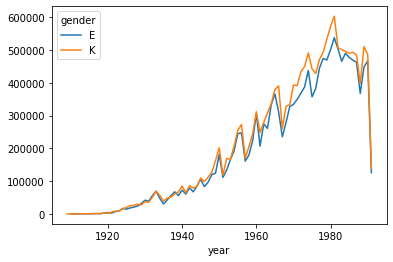

,male,female
1,ALI,FATMA
2,HASAN,AYSE
3,MEHMET,EMINE
4,OSMAN,HATICE
5,MUSTAFA,ZEHRA
6,ISMAIL,SERIFE
7,AHMET,ZEYNEP
8,HUSEYIN,MERYEM
9,ABDULLAH,HANIFE
10,MAHMUT,CEMILE


In [904]:
problem5('names-month-random.csv')